In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [29]:
df_test = pd.read_csv('Datasets/occupancy_data/datatest.txt', delimiter = ",")
df_train = pd.read_csv('Datasets/occupancy_data/datatraining.txt', delimiter = ",")

I start with df_train for training and df_test for testing
keep process same mostly because thinking on working with 2 datasets

In [4]:
df_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


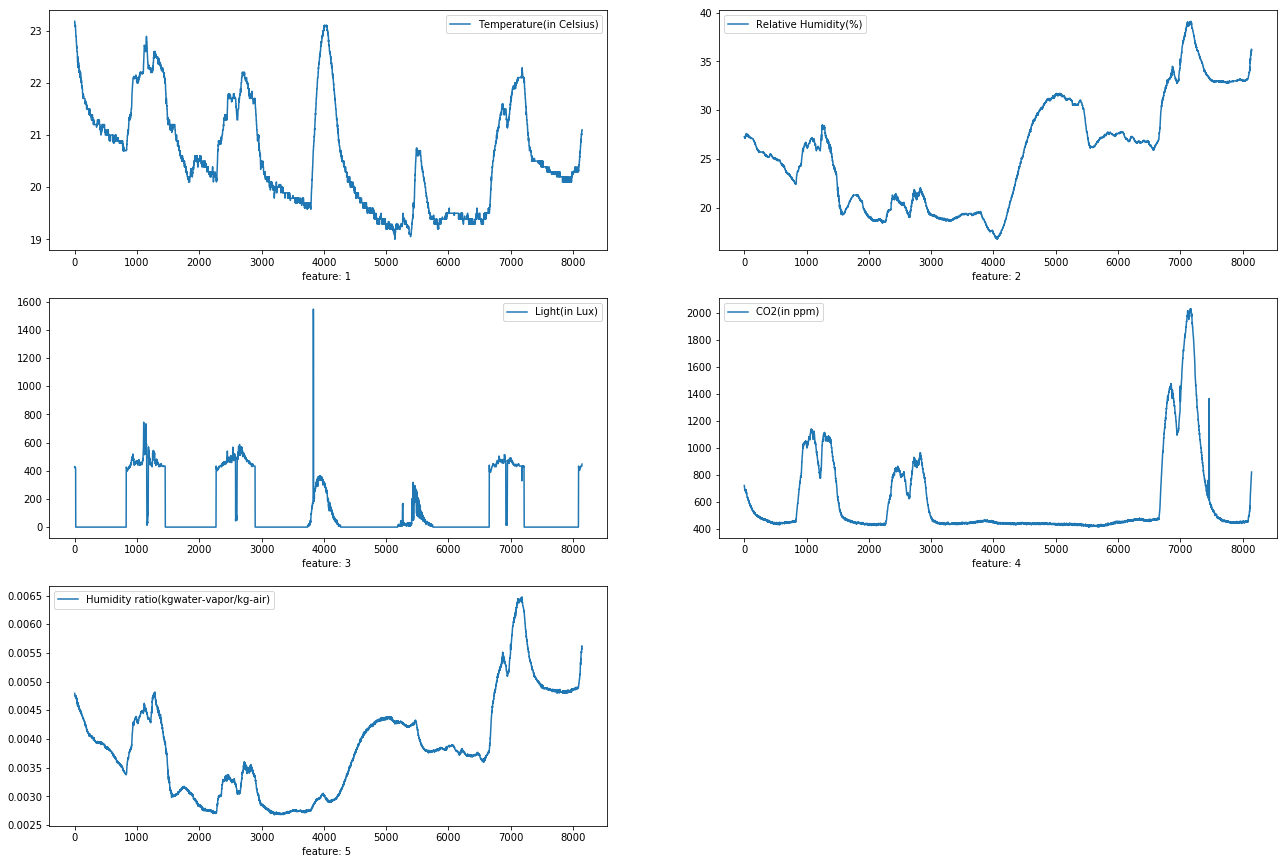

In [109]:
plt.figure(figsize=(22,15))
for i in range(0,df_train.shape[1]-2):
    plt.subplot(3,2,i+1)
    plt.plot(df_train.iloc[:,i+1], label=l[i])
    plt.legend()
    plt.xlabel(f'feature: {i+1} ')

In [5]:
l=["Temperature(in Celsius)","Relative Humidity(%)", "Light(in Lux)", "CO2(in ppm)","Humidity ratio(kgwater-vapor/kg-air)"]

In [6]:
df_train.shape

(8143, 7)

In [223]:
df_test.shape

(2665, 7)

In [19]:
df_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,occupied
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,occupied
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,occupied
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,occupied
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,occupied


In [224]:
X_train=df_train.iloc[:,1:-1].values
y_train=df_train['Occupancy'].values

In [225]:
X_train.shape

(8143, 5)

In [226]:
X_test=df_test.iloc[:,1:-1].values
y_test=df_test['Occupancy'].values

In [227]:
X_test.shape

(2665, 5)

In [229]:
###libraries from Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [230]:
#Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)
print(X_test.size())

torch.Size([2665, 5])


In [228]:
print(df_train.shape)

(8143, 7)


In [203]:
#making the actual ANN finally, #use the NN module for it
class ANN_classify(nn.Module):
    def __init__(self,input_features=5,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_con1=nn.Linear(input_features,hidden1)  #connect i/p to h1
        self.f_con2=nn.Linear(hidden1,hidden2)         #connect h1 to h2 
        self.out=nn.Linear(hidden2,out_features)             #connect h2 to o/p
    def forward(self,x):                                     
        x=F.relu(self.f_con1(x))                       #not actually the capital X but activation functions for nodes
        x=F.relu(self.f_con2(x))
        x=self.out(x)
        return x

In [204]:
#instantiating the class
torch.manual_seed(10)                                        #randomly for random number generator
model=ANN_classify()
model.parameters  ##calls the parameters fed

<bound method Module.parameters of ANN_classify(
  (f_con1): Linear(in_features=5, out_features=20, bias=True)
  (f_con2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [205]:
##Backward propogation----Define loss function, optimization algorithms
loss_function=nn.CrossEntropyLoss()                        # We use CrossEntropyLoss(Mostly a softmax function with negative log), NLLLoss was terrible and MSE didnt work altogether
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)          #Set learning rate 0.01 however I thought adam had adaptive learning rate


In [206]:
epochs=600       #training process
train_loses=[]
test_loses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    train_loses.append(loss)
    if i%10==1:
        print("Training iteration/epoc:{} and loss:{}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        model.eval()
        y_pred=model(X_test)
        loss=loss_function(y_pred,y_test)
        test_loses.append(loss)
        if i%10==1:
            print("Test iteration/epoc:{} and loss:{}".format(i,loss.item()))

Training iteration/epoc:1 and loss:14.606819152832031
Test iteration/epoc:1 and loss:14.35450553894043
Training iteration/epoc:11 and loss:1.0212312936782837
Test iteration/epoc:11 and loss:0.34082046151161194
Training iteration/epoc:21 and loss:0.4411886930465698
Test iteration/epoc:21 and loss:0.2888111174106598
Training iteration/epoc:31 and loss:0.29430460929870605
Test iteration/epoc:31 and loss:0.20480147004127502
Training iteration/epoc:41 and loss:0.12542930245399475
Test iteration/epoc:41 and loss:0.10343141108751297
Training iteration/epoc:51 and loss:0.11818746477365494
Test iteration/epoc:51 and loss:0.09812033176422119
Training iteration/epoc:61 and loss:0.09302781522274017
Test iteration/epoc:61 and loss:0.10219968110322952
Training iteration/epoc:71 and loss:0.08557738363742828
Test iteration/epoc:71 and loss:0.10635256767272949
Training iteration/epoc:81 and loss:0.08050718903541565
Test iteration/epoc:81 and loss:0.09496615082025528
Training iteration/epoc:91 and loss:

Text(0, 0.5, 'loss function')

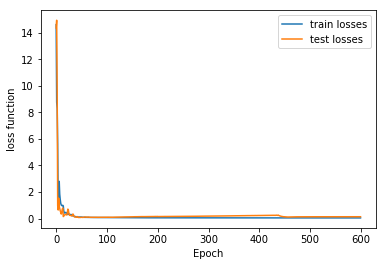

In [207]:
##plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),train_loses, label="train losses")
plt.plot(test_loses, label="test losses")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("loss function")

In [212]:
#Predictions in X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())

In [213]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(y_test,predictions)
print(cm,acc_knn)

[[1637   56]
 [   4  968]] 0.9774859287054409


In [150]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(y_test,predictions)
print(cm,acc_knn)

[[1637   56]
 [   6  966]] 0.9767354596622889


Text(69.0, 0.5, 'Actual values')

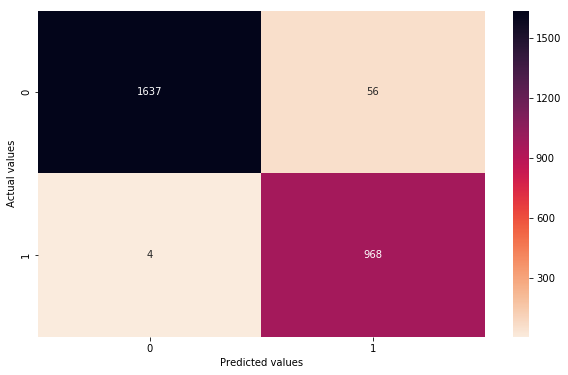

In [221]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, cmap='rocket_r', annot=True,fmt='g')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [201]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score

In [202]:
print("Accuracy",accuracy_score(y_test,predictions))
print("Precision",precision_score(y_test,predictions))
print("Recall",recall_score(y_test,predictions))
f1=fbeta_score(y_test,predictions,beta=1)
print("F1",f1)
print(classification_report(y_test,predictions))

Accuracy 0.9774859287054409
Precision 0.9453125
Recall 0.9958847736625515
F1 0.969939879759519
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [168]:
##save the model
torch.save(model,'Models/diabetes.pt')

In [170]:
#load the model
model=torch.load('Models/diabetes.pt')

In [231]:
model.eval()

ANN_classify(
  (f_con1): Linear(in_features=5, out_features=20, bias=True)
  (f_con2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)